# Lab 6.4: Regression Diagnostics

**Question 1**

Using the data in https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv :

1) Run a multiple regression model of $y$ against all the $x$ variables and then produce the residuals and fitted values. Create the residual diagnostic plot of residuals on the Y axis against the fitted values on the X axis. 

2) Is the linearity assumption met?  

3) Test for non-Normality.  

4) Test for heteroskedasticity. 

#### 1

In [1]:
%pylab inline

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import yaml

from sqlalchemy import create_engine
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breushpagan

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

Populating the interactive namespace from numpy and matplotlib


In [2]:
homer = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv')
homer.head()

,y,x1,x2,x3,x4,x5,x6
0,-2.17360,-0.023816,-0.012885,0.045936,-0.182890,0.028694,-0.81119
1,-1.29570,0.018453,0.058999,-0.072399,0.008679,-0.084344,-0.24208
2,0.14539,0.054999,0.131770,-0.067223,0.202430,0.127060,0.63388
3,0.92959,-0.018933,-0.010875,-0.028255,0.017912,0.084330,0.66062
4,0.90259,-0.000877,0.066941,-0.048190,0.064742,0.147880,0.26643


In [3]:
homer.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,y,x1,x2,x3,x4,x5,x6
count,6054.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000
mean,-0.008547,0.000079,-0.000007,-0.000049,0.000068,-0.000027,-0.001662
std,1.202365,0.039200,0.080779,0.058512,0.156589,0.119576,0.784465
min,-3.810000,-1.000000,-0.303830,-0.199880,-0.633240,-0.479130,-2.903200
25%,NaN,-0.021888,-0.054068,-0.039083,-0.109580,-0.081445,-0.535640
50%,NaN,-0.000125,0.000111,0.000156,-0.000083,-0.000788,-0.018469
75%,NaN,0.022555,0.055193,0.038948,0.107030,0.079695,0.514390
max,4.035900,1.170000,0.292970,0.199290,0.533080,0.454490,3.619300


In [4]:
# We have missing data on variable y:
homer = homer.dropna()

In [5]:
homer.describe()

,y,x1,x2,x3,x4,x5,x6
count,6054.000000,6054.000000,6054.000000,6054.000000,6054.000000,6054.000000,6054.000000
mean,-0.008547,-0.000027,0.000006,-0.000029,0.000056,0.000028,-0.001640
std,1.202365,0.033310,0.080791,0.058493,0.156617,0.119564,0.784653
min,-3.810000,-0.104170,-0.303830,-0.199880,-0.633240,-0.479130,-2.903200
25%,-0.879910,-0.021885,-0.054038,-0.039078,-0.109588,-0.081435,-0.535820
50%,-0.066951,-0.000128,0.000113,0.000168,-0.000134,-0.000773,-0.018369
75%,0.929407,0.022538,0.055230,0.038944,0.107017,0.079743,0.514525
max,4.035900,0.112820,0.292970,0.199290,0.533080,0.454490,3.619300


In [6]:
X = homer[['x1', 'x2', 'x3', 'x4', 'x5','x6']]
X = sm.add_constant(X)
y = homer['y']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     452.1
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:58:46   Log-Likelihood:                -8583.7
No. Observations:                6054   AIC:                         1.718e+04
Df Residuals:                    6047   BIC:                         1.723e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0069      0.013     -0.534      0.593        -0.032     0.018
x1             4.0686      0.508      8.015      0.000         3.073     5.064
x2             1.1412      0.257      4.442      0.000         0.638     1.645
x3             4.0318      0.358     11.249      0.000         3.329     4.734
x4             0.9373      0.127      7.362      0.000         0.688     1.187
x5             3.9840      0.171     23.316      0.000         3.649     4.319
x6             0.9967      0.022     44.744      0.000         0.953     1.040
==============================================================================
Omnibus:                      635.831   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.770
Skew:                           0.070   Prob(JB):                     7.54e-41
Kurtosis:                       2.156   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
results.params

const   -0.006857
x1       4.068585
x2       1.141218
x3       4.031808
x4       0.937294
x5       3.984018
x6       0.996700
dtype: float64

In [8]:
#fitted_values = []
#for i in range(len(homer)):
    #fitted = results.params[0] + homer['x1'][i] * results.params[1] + homer['x2'][i] * results.params[2] + homer['x3'][i] * results.params[3] + homer['x4'][i] * results.params[4] + homer['x5'][i] * results.params[5] + homer['x6'][i] * results.params[6]
    #fitted_values.append(fitted)

In [9]:
fitted_values = []
for index, rows in homer.iterrows():
    fitted = results.params[0] + rows['x1'] * results.params[1] + rows['x2'] * results.params[2] + rows['x3'] * results.params[3] + rows['x4'] * results.params[4] + rows['x5'] * results.params[5] + rows['x6'] * results.params[6]
    fitted_values.append(fitted)

In [10]:
fitted_series = pd.Series(fitted_values)

In [11]:
homer['fitted_values'] = fitted_series

In [12]:
homer.head()

,y,x1,x2,x3,x4,x5,x6,fitted_values
0,-2.17360,-0.023816,-0.012885,0.045936,-0.182890,0.028694,-0.81119,-0.798871
1,-1.29570,0.018453,0.058999,-0.072399,0.008679,-0.084344,-0.24208,-0.725522
2,0.14539,0.054999,0.131770,-0.067223,0.202430,0.127060,0.63388,1.423993
3,0.92959,-0.018933,-0.010875,-0.028255,0.017912,0.084330,0.66062,0.800984
4,0.90259,-0.000877,0.066941,-0.048190,0.064742,0.147880,0.26643,0.787065


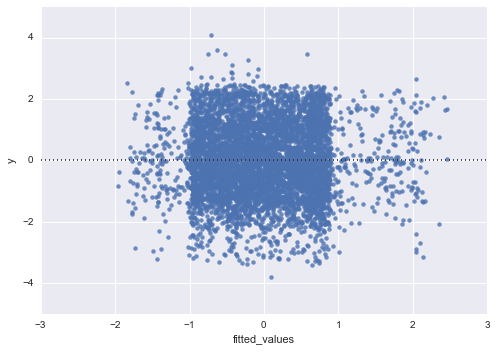

In [13]:
sns.residplot('fitted_values', 'y', homer);

#### 2

No.

#### 3

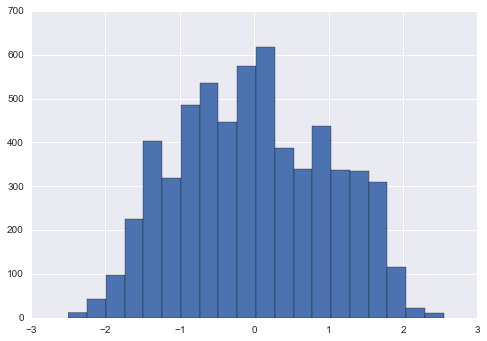

In [14]:
# Histogram of residuals.
res1 = results.resid
hist(res1, bins = 20);

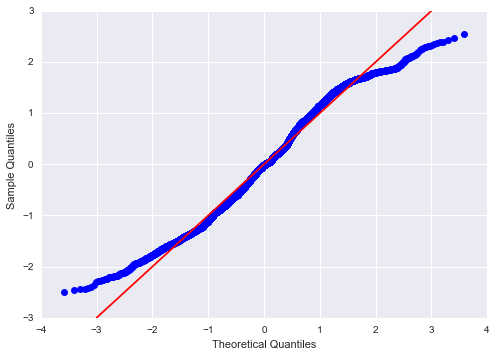

In [15]:
## QQ plot of residuals.
sres1 = results.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

Numerical method for normality. 

$H_0$ : data is Normally distributed.

$H_a$: data is not Normally distributed.

A small p-value indicates violation of the Normality assumption.

From the OLS model we get:

Jarque-Bera (JB): 184.770

Prob(JB): 7.54e-41

The p-value for the Normality test is 7.54e-41, which shows evidence of non-Normality.

#### 4

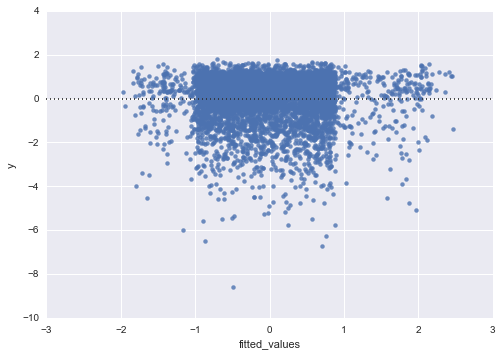

In [22]:
# Note that we are taking the abs value of y, since some values of y are negative and the log does not exist.
log_y = np.log(abs(y))
model_log = sm.OLS(log_y, X)
results_log = model_log.fit()

sns.residplot('fitted_values', log_y, homer);

Numerical tests for heteroskedasticity.  

$H_0$: constant variance  

$H_1$: non-constant variance  

A small p-value gives evidence for non-constant variance (heteroskedasticity).

In [24]:
het_breushpagan(results_log.resid, results_log.model.exog) # the second output gives the p-value of the test

(53.829723571229273,
 7.9840268222824538e-10,
 9.0416416934577306,
 7.2893144600151038e-10)

The p-value for the heteroskedasticity test is 7.9840268222824538e-10, which shows evidence of heteroskedasticity.

**Question 2**

You are given data about the Scottish Hill Climb races in the table `hills` which consists of 4 columns:

```
Race:     The name of the race (PK)
Distance: The distance of the race in miles
Climb:    Elevation climbed during race in feet
Time:     Record time for race in minutes
```

In [19]:
hills = pd.read_sql("SELECT * FROM hills", engine)
hills.head()

,Race,Distance,Climb,Time
0,Greenmantle,2.5,650,16.083
1,Carnethy,6.0,2500,48.350
2,CraigDunain,6.0,900,33.650
3,BenRha,7.5,800,45.600
4,BenLomond,8.0,3070,62.267


1) Explore the data with a scatter matrix and a correlation plot (`statsmodels.graphics.plot_corr`).  

   Build a multiple regression model to predict `Time` based on `Distance` and `Time`.
   

2) Interpret the coefficients of your model.  



3) Plot the fitted values of the response (`Time`) against the standardized residuals of the model.

   **Hint:**
   - Use `model.fittedvalues` to get fitted values and `model.resid_pearson` to get the standardized residuals
 
   Does the residual plot appear to fulfill the following assumptions:
   - Linearity
   - Normality
   - Homoscedasticity 
   
   What are the consequences if those assumptions are not met ? 


4) An additional test for Normality of the residuals is the Q-Q plot. If the quantiles of the residuals match that of a Normal distribution, then the residuals are normally distribution. 

   Import the qq-plot function from statsmodels `from statsmodels.graphics.gofplots import qqplot`.
   
   Draw a straight line where the quantiles of the residuals are the same as those of a standard Normal distribution.
   
   The plot you produce should look similar to the one below:
   
   ![](images/qq.png)
   
   Do the residuals appear to be Normal ?
  
   

5) (Extra Credit) To identify outliers, one can also look at the leverage-residual plot. 

   Explain what leverage means and how is leverage computed. Is a data point influential if the residual is large but the leverage is low? What about if the residual and leverage are both high?
   
   Import the leverage-residual plot from statsmodels by `from statsmodels.graphics.regressionplots import plot_leverage_resid2`. You can call it by just feeding in the fitted model.
   
   ```python
   plot_leverage_resid2(model)
   ```
   
   Identify the races where the leverage and residual are high. Comment on the commonalities between those races.
   
   

6) (Extra Credit) What are the precautions you need to bare in mind if you were to remove the outliers you have identified in `5.` ?
   
   Remove the outliers in the dataset and re-run the model. 
   
   Plot the residual plot and Q-Q plot as you have done previously. Comment on the plots.
   
   Also comment on the fit of the model to the data relative to the first model.

**Question 3**

You are given the price and features of some used cars in the tables `car_price` and `car_type`. Car company X want you to build a model to predict car price based on some given features about the car.

1) Explore the dataset with a correlation matrix. You should select only numeric columns when you are constructing the correlation matrix.  
   ```python
   numerics_only = car_price.select_dtypes(['int64', 'float64'])
   sm.graphics.plot_corr(numerics_only.corr(), xnames=numerics_only.columns.tolist())
   ```

   Which 2 variables are strongly multicollinear with each other based on your observation of the correlation matrix ?
   
   Which one would you choose to put in the model and why (subjective answer).

In [20]:
car_price = pd.read_sql("SELECT * FROM car_price", engine)
car_price.head()

,car_id,price,mileage,make,model,trim,cruise,sound,leather
0,0,17314.103129,8221,Buick,Century,Sedan 4D,1,1,1
1,1,17542.036083,9135,Buick,Century,Sedan 4D,1,1,0
2,2,16218.847862,13196,Buick,Century,Sedan 4D,1,1,0
3,3,16336.913140,16342,Buick,Century,Sedan 4D,1,0,0
4,4,16339.170324,19832,Buick,Century,Sedan 4D,1,0,1


In [21]:
car_type = pd.read_sql("SELECT * FROM car_type", engine)
car_type.head()

,make,model,trim,type,cylinder,liter,doors
0,Buick,Century,Sedan 4D,Sedan,6,3.1,4
1,Buick,Lacrosse,CX Sedan 4D,Sedan,6,3.6,4
2,Buick,Lacrosse,CXL Sedan 4D,Sedan,6,3.6,4
3,Buick,Lacrosse,CXS Sedan 4D,Sedan,6,3.8,4
4,Buick,Lesabre,Custom Sedan 4D,Sedan,6,3.8,4


2) Fit a multiple regression model with all the available features to predict price. Check all the assumptions made about the model as you have done previously. Comment on the Q-Q plot and the residual plot.

   

3) One of the remedies to heteroskedastic residuals is to take the log of the response. Log the response and re-run the model and check the assumptions again.

   

4) As a rule of thumb, the fewer variables there are in a model, the easier it is to interpret the model. Use your judgement and remove features which you think are of little practical importance and have coefficients that are statistically insignificant.

   

5) (Extra Credit) Run outlier diagnostics in order to identify and explain outliers of the model.